In [9]:
import pandas as pd
import numpy as np

In [10]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter #for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm

In [12]:
import io
import requests
from zipfile import ZipFile
from IPython.display import display_html

In [13]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')

pandas  version: 1.3.5
numpy   version: 1.22.1


In [14]:
## url='http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
#url='https://github.com/prasertcbs/basic-dataset/raw/master/ISLR/Advertising.csv'
## df=pd.read_csv(url, index_col=0)
#df=pd.read_csv(url, usecols=[1, 2, 3, 4])
## df=pd.read_csv(url, usecols=list(range(1, 5)))
#df.head()

In [15]:
##การส่งข้อมูลตาราง DataFrame ไปเป็นไฟล์ .csv หรือ .xlsx
#c.to_csv('local_data.csv')
#d.to_excel('LEdata.xlsx')
#df = pd.read_excel(r'D:\HDI\HDI_data.xlsx') #, index_col='State')
#b = pd.read_csv('D:/wbdata/cancer2.csv', index_col='Entity', parse_dates=True)

In [16]:
# covid = pd.read_csv('D:/Python Analysis/owid-covid-data.csv')
# covid

covid = pd.read_csv('D:\QAPublicAd\MulticlassClassification\owid-covid-data.csv')
covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156313,ZWE,Africa,Zimbabwe,2022-01-17,226460.0,382.0,494.286,5258.0,11.0,11.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156314,ZWE,Africa,Zimbabwe,2022-01-18,226460.0,0.0,494.286,5258.0,0.0,11.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156315,ZWE,Africa,Zimbabwe,2022-01-19,226887.0,427.0,350.571,5266.0,8.0,7.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156316,ZWE,Africa,Zimbabwe,2022-01-20,227552.0,665.0,352.571,5276.0,10.0,7.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [20]:
covid.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.534860e+05,1.534470e+05,1.522960e+05,1.360740e+05,136244.000000,136112.000000,152771.000000,152732.000000,151586.000000,135372.000000,...,99808.000000,98374.000000,64457.000000,116390.000000,145903.000000,128162.000000,5.338000e+03,5338.000000,5338.000000,5338.000000
mean,2.215709e+06,9.512424e+03,9.270475e+03,5.397983e+04,170.124527,169.426331,24540.287594,125.433374,121.132030,469.597209,...,10.629535,32.766688,50.803413,3.028438,73.581250,0.725792,3.496477e+04,8.923803,15.775489,875.309592
std,1.315884e+07,6.623438e+04,6.085351e+04,2.835041e+05,829.096878,808.851014,40283.923865,497.569503,347.387759,736.984157,...,10.561261,13.515745,31.811584,2.451605,7.496938,0.149978,9.955045e+04,16.459387,30.510014,1326.438007
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-1918.000000,-232.143000,0.001000,-3125.829000,-272.971000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,1.665000e+03,1.000000e+00,6.000000e+00,7.000000e+01,0.000000,0.143000,536.245000,0.027750,1.487000,16.409000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-1.130000e+02,-1.000000,-0.950000,-43.494684
50%,2.188400e+04,7.300000e+01,9.714300e+01,7.035000e+02,2.000000,2.286000,4158.725000,10.427000,16.708000,110.015000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,2.794450e+03,5.520000,6.955000,408.063315
75%,2.660462e+05,9.610000e+02,1.012143e+03,6.665000e+03,19.000000,20.143000,32290.053500,90.385000,103.983500,640.329250,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.196465e+04,13.960000,22.507500,1495.516821
max,3.464643e+08,4.232499e+06,3.234220e+06,5.585224e+06,18061.000000,14704.714000,426933.320000,51427.491000,11238.573000,6115.035000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080315e+06,111.010000,374.400000,8328.196785


In [17]:
# covid = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',parse_dates=['date']) #, index_col='Entity', parse_dates=True)
# covid

In [21]:
covid.shape

(156318, 67)

In [28]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156318 entries, 0 to 156317
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    156318 non-null  object 
 1   continent                                   146921 non-null  object 
 2   location                                    156318 non-null  object 
 3   date                                        156318 non-null  object 
 4   total_cases                                 153486 non-null  float64
 5   new_cases                                   153447 non-null  float64
 6   new_cases_smoothed                          152296 non-null  float64
 7   total_deaths                                136074 non-null  float64
 8   new_deaths                                  136244 non-null  float64
 9   new_deaths_smoothed                         136112 non-null  float64
 

In [39]:
#Save model to .csv
#data1.to_csv('D:/Face Detection/Datanew/data1.csv')
data = covid.loc[:,['date','location','total_cases','new_cases','total_deaths','life_expectancy','gdp_per_capita']].dropna() #คำสั่ง .loc ใช้เลือกข้อมูลบางคอลัมน์
data

,date,location,total_cases,new_cases,total_deaths,life_expectancy,gdp_per_capita
28,2020-03-23,Afghanistan,40.0,6.0,1.0,64.83,1803.987
29,2020-03-24,Afghanistan,42.0,2.0,1.0,64.83,1803.987
30,2020-03-25,Afghanistan,74.0,32.0,1.0,64.83,1803.987
31,2020-03-26,Afghanistan,80.0,6.0,2.0,64.83,1803.987
32,2020-03-27,Afghanistan,91.0,11.0,2.0,64.83,1803.987
...,...,...,...,...,...,...,...
156313,2022-01-17,Zimbabwe,226460.0,382.0,5258.0,61.49,1899.775
156314,2022-01-18,Zimbabwe,226460.0,0.0,5258.0,61.49,1899.775
156315,2022-01-19,Zimbabwe,226887.0,427.0,5266.0,61.49,1899.775
156316,2022-01-20,Zimbabwe,227552.0,665.0,5276.0,61.49,1899.775


In [40]:
#data5 = data5.loc[:, ['Entity','Code','Year','Breast cancer (deaths)']]
#s = data1.drop([77,140,43,119]) #,axis=0).drop([60604]) #ลบแถว
df1 = data.loc[data['date'] == '2022-01-21'].sort_values(['total_deaths'],ascending=False) #.drop([147610]) #.rename(columns={'Internet':'y'}) #ข้อมูล ณ วันที่ 7 ธค.2020
df1

,date,location,total_cases,new_cases,total_deaths,life_expectancy,gdp_per_capita
154317,2022-01-21,World,346464304.0,3882501.0,5585224.0,72.58,15469.207
148503,2022-01-21,United States,70209840.0,879980.0,864556.0,78.86,54225.446
20730,2022-01-21,Brazil,23766499.0,171321.0,622875.0,75.88,14103.452
66244,2022-01-21,India,38903731.0,337704.0,488884.0,69.66,6426.674
117046,2022-01-21,Russia,10804032.0,49127.0,318200.0,72.58,24765.954
...,...,...,...,...,...,...,...
65521,2022-01-21,Iceland,54579.0,1458.0,44.0,82.99,46482.958
24109,2022-01-21,Burundi,36868.0,0.0,38.0,61.58,702.225
118895,2022-01-21,Saint Kitts and Nevis,5190.0,49.0,28.0,76.23,24654.385
17341,2022-01-21,Bhutan,3458.0,141.0,3.0,71.78,8708.597


In [61]:
df2 = df1.sort_values(['total_deaths'],ascending=False) #.set_index('location') #.head(60) #.reset_index()
s = df2.drop([154317]).set_index('location').head(60) #,axis=0) #ลบแถว
s

,date,total_cases,new_cases,total_deaths,life_expectancy,gdp_per_capita
location,,,,,,
United States,2022-01-21,70209840.0,879980.0,864556.0,78.86,54225.446
Brazil,2022-01-21,23766499.0,171321.0,622875.0,75.88,14103.452
India,2022-01-21,38903731.0,337704.0,488884.0,69.66,6426.674
Russia,2022-01-21,10804032.0,49127.0,318200.0,72.58,24765.954
Mexico,2022-01-21,4595589.0,100279.0,302721.0,75.05,17336.469
Peru,2022-01-21,2839519.0,59470.0,203994.0,76.74,12236.706
United Kingdom,2022-01-21,15747291.0,96056.0,153616.0,81.32,39753.244
Indonesia,2022-01-21,4280248.0,2604.0,144201.0,71.72,11188.744
Italy,2022-01-21,9603856.0,185600.0,142963.0,83.51,35220.084


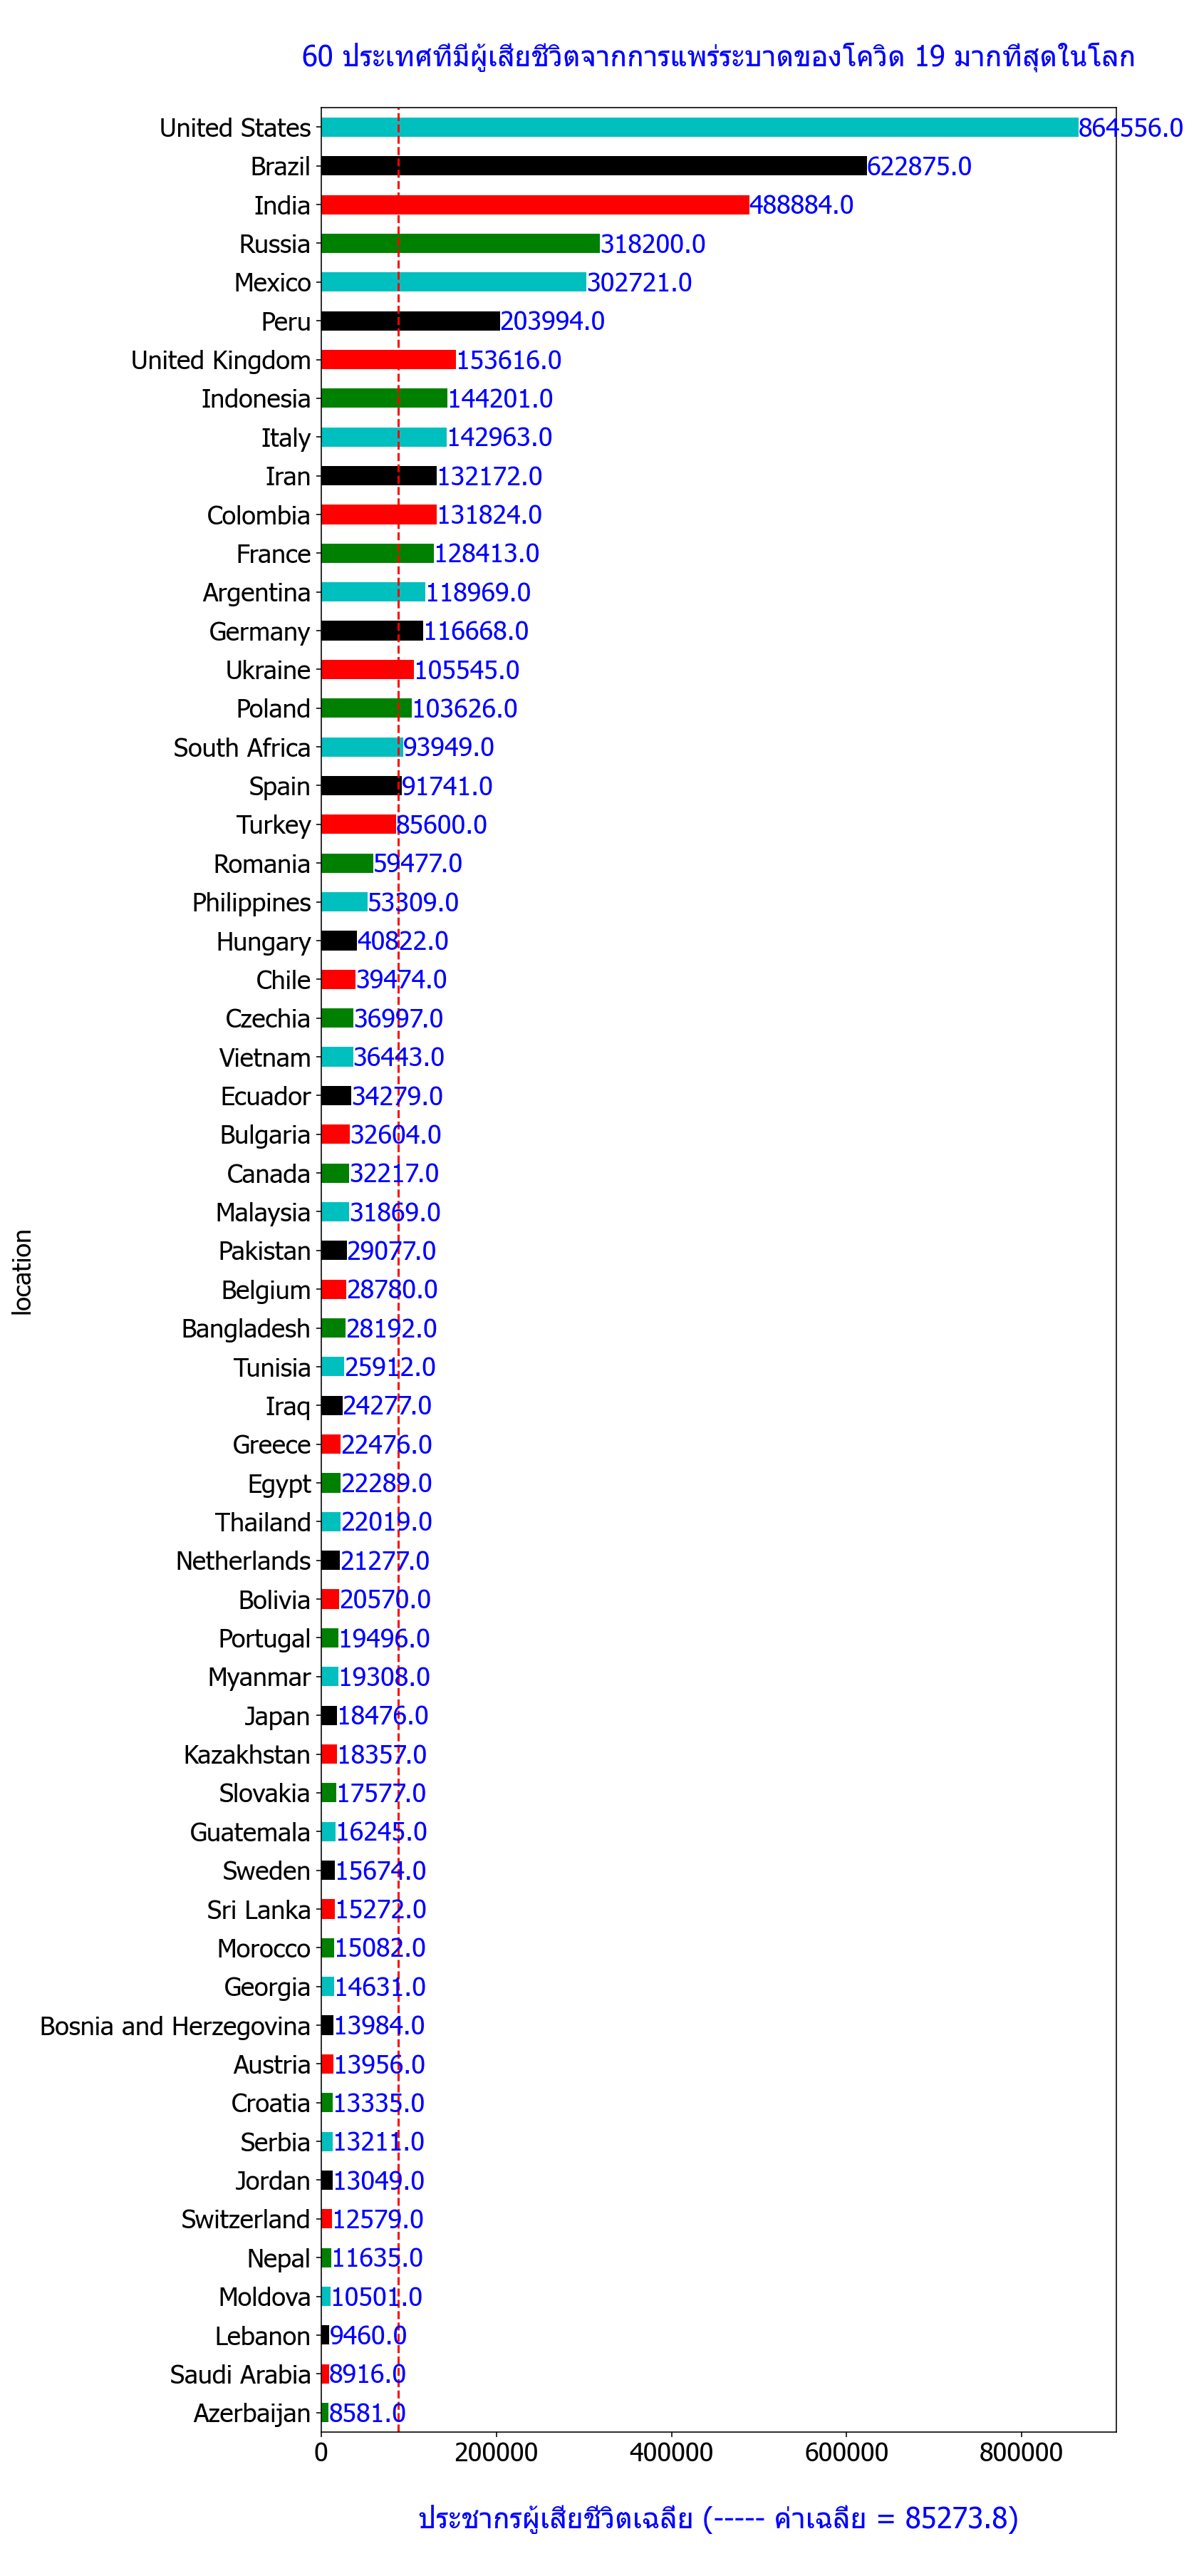

In [62]:
avg = s['total_deaths'].mean() #.sum()/10
plt.axvline(avg, color='red', linestyle='--') 
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=18

ax = s['total_deaths'].sort_values(ascending=True).plot(kind='barh',
                          figsize=(10, 30), #width, length
                          linewidth=25,
                          fontsize=18,
                          color=['green','red','black','c']);

ax.set_title('\n60 ประเทศที่มีผู้เสียชีวิตจากการแพร่ระบาดของโควิด 19 มากที่สุดในโลก\n', 
             fontsize=20, color='blue')
ax.set_xlabel('\nประชากรผู้เสียชีวิตเฉลี่ย (----- ค่าเฉลี่ย = 85273.8)\n', fontsize=20, color='blue');

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.01, \
            str(round((i.get_width()), 2)), fontsize=18, color='blue')

# invert for largest on top 
#ax.invert_yaxis()

In [63]:
avg.round(2)

88203.37

In [64]:
df3 = df1.sort_values(['total_deaths'],ascending=False).set_index('location').tail(30) #.reset_index()
df3

,date,total_cases,new_cases,total_deaths,life_expectancy,gdp_per_capita
location,,,,,,
Niger,2022-01-21,8503.0,0.0,295.0,62.42,926.000
Liberia,2022-01-21,7208.0,0.0,288.0,64.10,752.788
Barbados,2022-01-21,38171.0,549.0,274.0,79.19,16978.068
Maldives,2022-01-21,112628.0,1697.0,269.0,78.92,15183.616
Mauritius,2022-01-21,24903.0,0.0,240.0,74.99,20292.745
Nicaragua,2022-01-21,17604.0,0.0,219.0,74.48,5321.444
Hong Kong,2022-01-21,12918.0,11.0,213.0,84.86,56054.920
Djibouti,2022-01-21,15250.0,50.0,189.0,67.11,2705.406
Aruba,2022-01-21,32056.0,221.0,187.0,76.29,35973.781


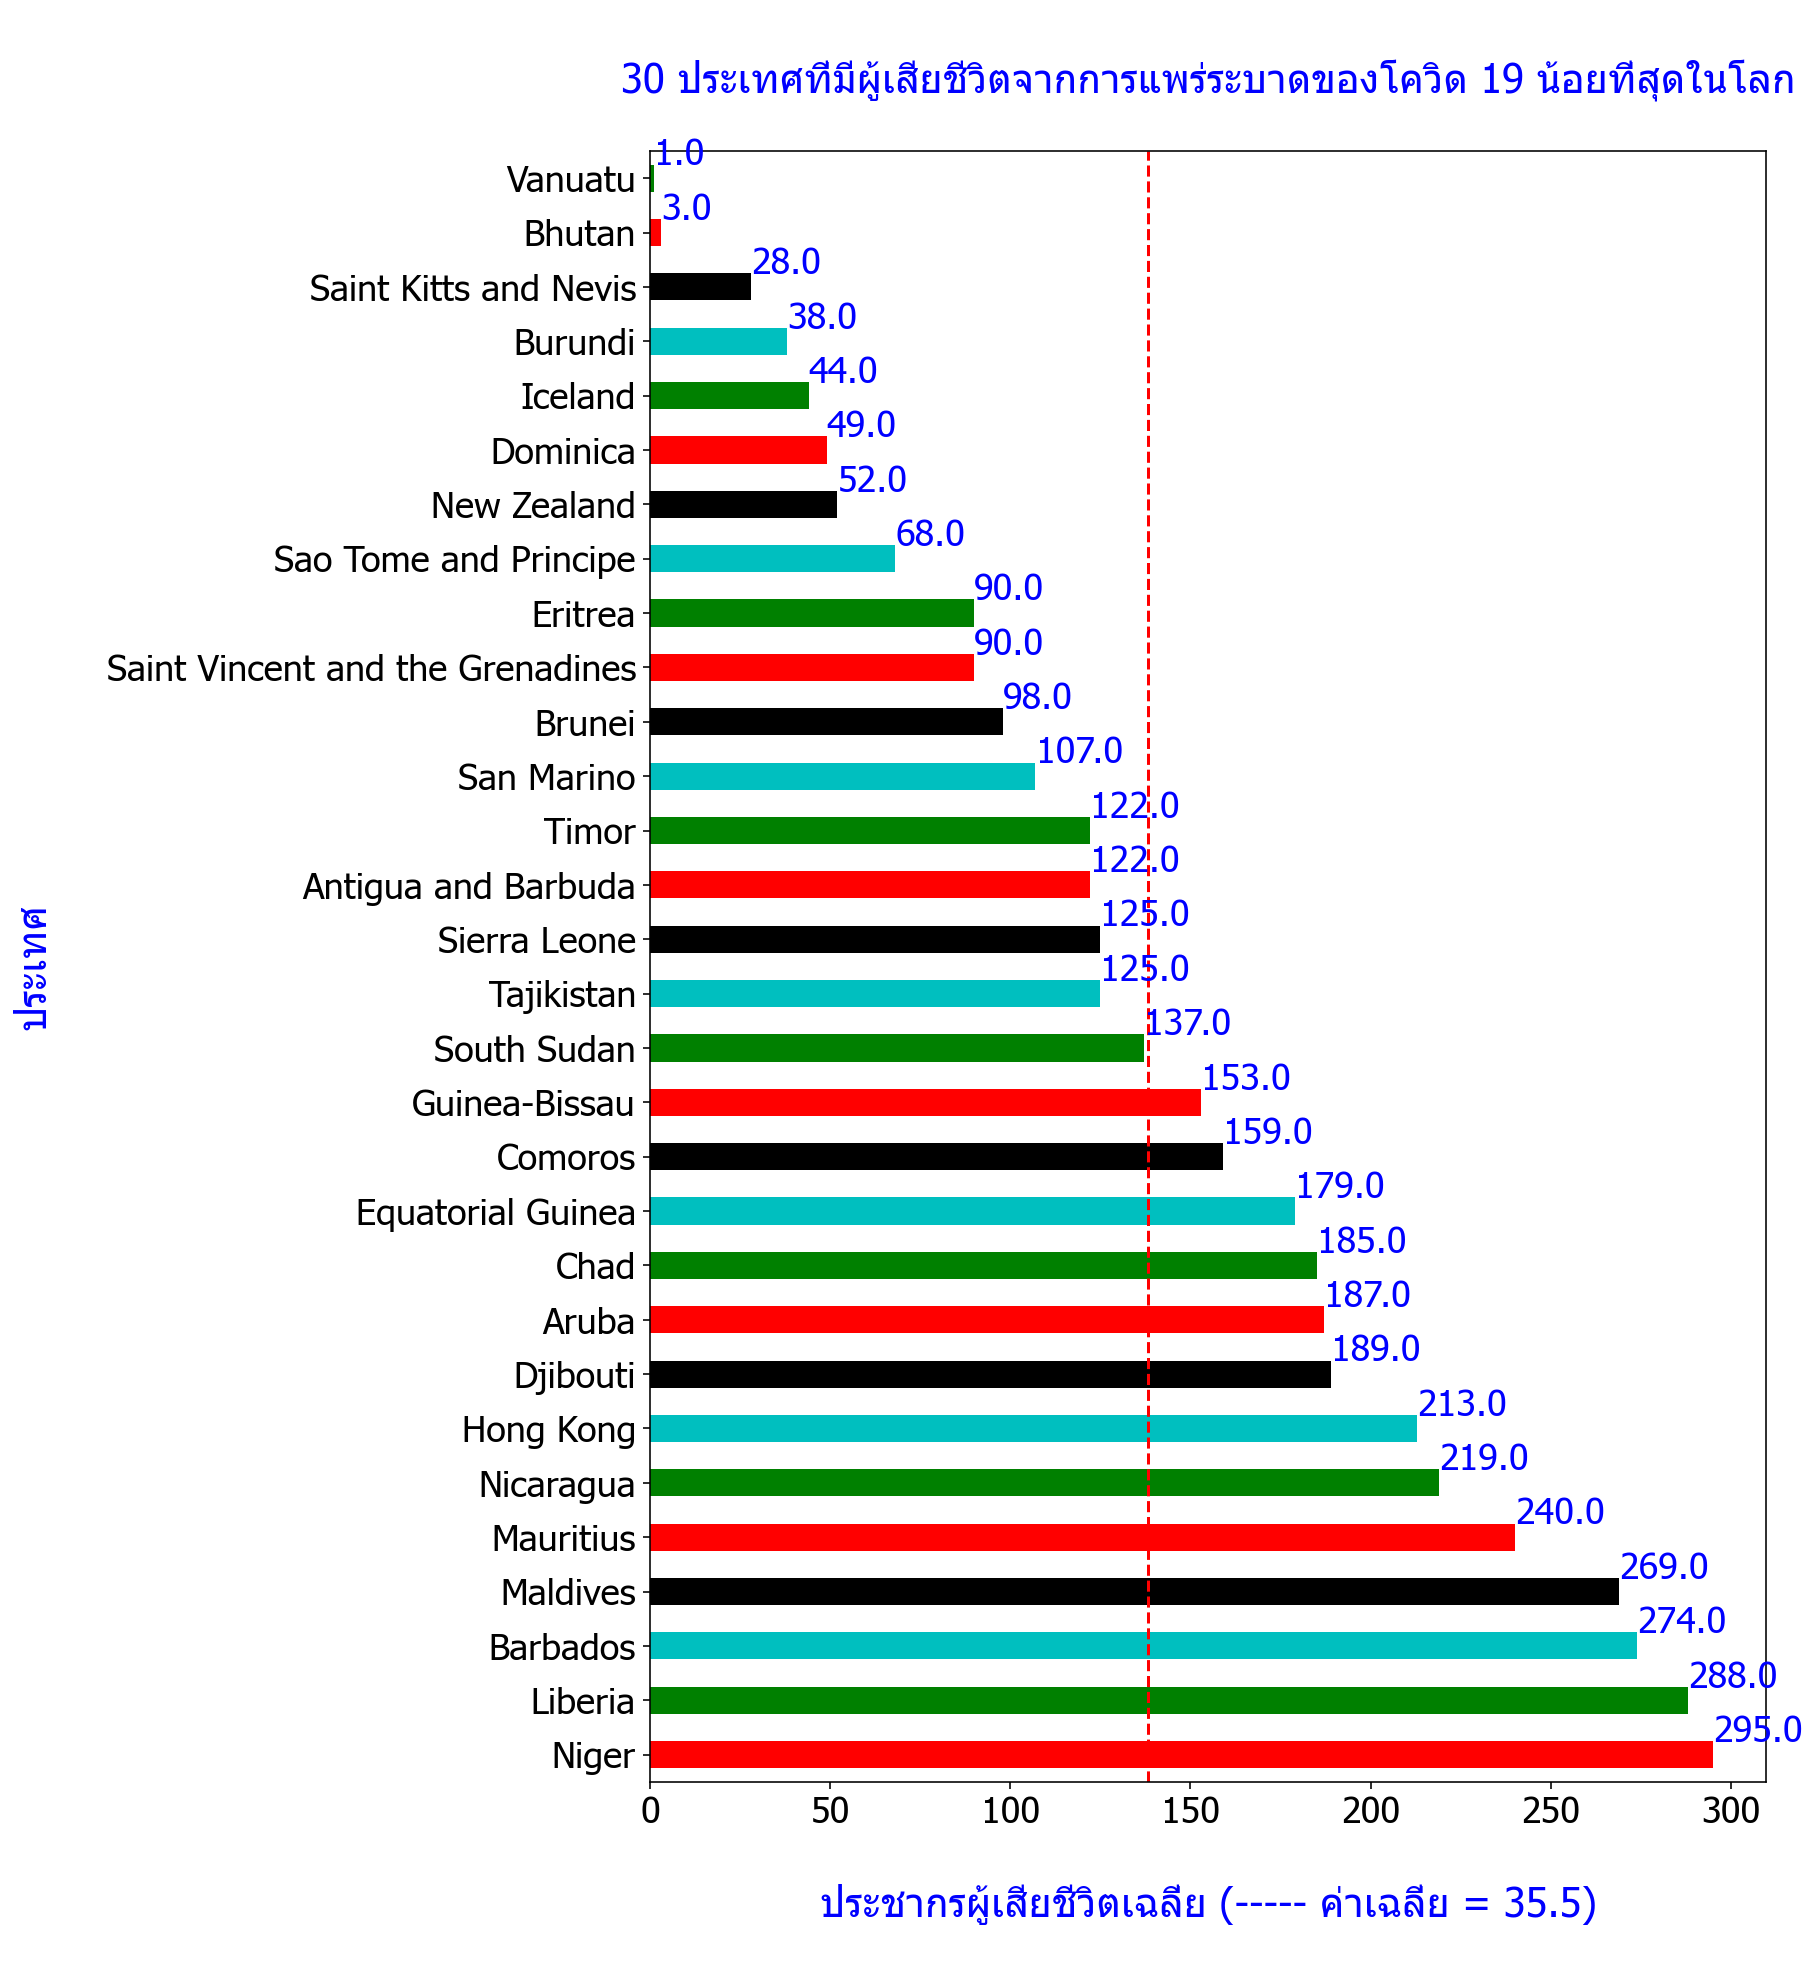

In [65]:
avg = df3['total_deaths'].mean() #.sum()/10
plt.axvline(avg, color='red', linestyle='--') 
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=18

ax = df3['total_deaths'].sort_values(ascending=True).plot(kind='barh',
                          figsize=(10, 15), #width, length
                          linewidth=25,
                          fontsize=18,
                          color=['green','red','black','c']);

ax.set_title('\n30 ประเทศที่มีผู้เสียชีวิตจากการแพร่ระบาดของโควิด 19 น้อยที่สุดในโลก\n', 
             fontsize=20, color='blue')
ax.set_xlabel('\nประชากรผู้เสียชีวิตเฉลี่ย (----- ค่าเฉลี่ย = 35.5)\n', fontsize=20, color='blue');
ax.set_ylabel('ประเทศ\n', fontsize=20, color='blue');

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.01, \
            str(round((i.get_width()), 2)), fontsize=18, color='blue')

# invert for largest on top 
ax.invert_yaxis()

In [66]:
avg.round(2)

138.3

In [67]:
# 10 Countries in AEC
AEC = df1.loc[df1['location'].isin(['Singapore','Indonesia','Thailand','Myanmar','Vietnam','Brunei','Laos','Cambodia','Malaysia','Philippines'])].set_index('location') #.reset_index() 
AEC

,date,total_cases,new_cases,total_deaths,life_expectancy,gdp_per_capita
location,,,,,,
Indonesia,2022-01-21,4280248.0,2604.0,144201.0,71.72,11188.744
Philippines,2022-01-21,3357083.0,32605.0,53309.0,71.23,7599.188
Vietnam,2022-01-21,2110737.0,15935.0,36443.0,75.40,6171.884
Malaysia,2022-01-21,2824973.0,4046.0,31869.0,76.16,26808.164
Thailand,2022-01-21,2369814.0,8112.0,22019.0,77.15,16277.671
Myanmar,2022-01-21,533815.0,83.0,19308.0,67.13,5591.597
Cambodia,2022-01-21,120956.0,42.0,3015.0,69.82,3645.070
Singapore,2022-01-21,307813.0,10264.0,846.0,83.62,85535.383
Laos,2022-01-21,128924.0,676.0,518.0,67.92,6397.360


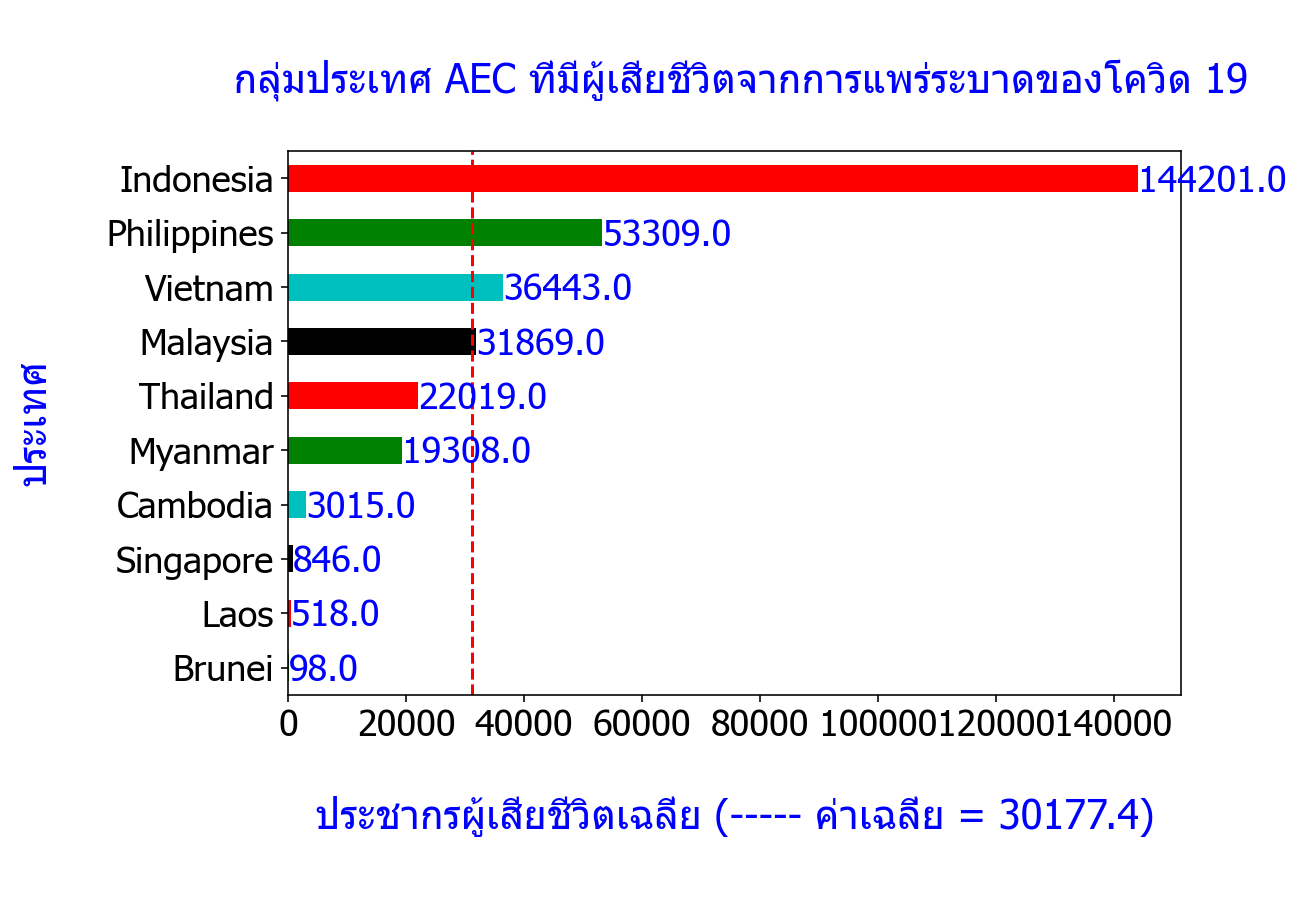

In [68]:
avg = AEC['total_deaths'].mean() #.sum()/10
plt.axvline(avg, color='red', linestyle='--') 
plt.rcParams['font.family']='Tahoma'
plt.rcParams['font.size']=18

ax = AEC['total_deaths'].sort_values(ascending=True).plot(kind='barh',
                          figsize=(8, 5), #width, length
                          linewidth=25,
                          fontsize=18,
                          color=['green','red','black','c']);

ax.set_title('\n กลุ่มประเทศ AEC ที่มีผู้เสียชีวิตจากการแพร่ระบาดของโควิด 19\n', 
             fontsize=20, color='blue')
ax.set_xlabel('\nประชากรผู้เสียชีวิตเฉลี่ย (----- ค่าเฉลี่ย = 30177.4)\n', fontsize=20, color='blue');
ax.set_ylabel('ประเทศ\n', fontsize=20, color='blue');

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.01, i.get_y()+.01, \
            str(round((i.get_width()), 2)), fontsize=18, color='blue')

# invert for largest on top 
#ax.invert_yaxis()

In [69]:
avg

31162.6

In [71]:
co = pd.read_csv('D:\QAPublicAd\MulticlassClassification\owid-covid-data.csv')
co

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156313,ZWE,Africa,Zimbabwe,2022-01-17,226460.0,382.0,494.286,5258.0,11.0,11.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156314,ZWE,Africa,Zimbabwe,2022-01-18,226460.0,0.0,494.286,5258.0,0.0,11.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156315,ZWE,Africa,Zimbabwe,2022-01-19,226887.0,427.0,350.571,5266.0,8.0,7.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
156316,ZWE,Africa,Zimbabwe,2022-01-20,227552.0,665.0,352.571,5276.0,10.0,7.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
# co = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv',parse_dates=['date']) #, index_col='Entity', parse_dates=True)
# co

In [72]:
co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156318 entries, 0 to 156317
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    156318 non-null  object 
 1   continent                                   146921 non-null  object 
 2   location                                    156318 non-null  object 
 3   date                                        156318 non-null  object 
 4   total_cases                                 153486 non-null  float64
 5   new_cases                                   153447 non-null  float64
 6   new_cases_smoothed                          152296 non-null  float64
 7   total_deaths                                136074 non-null  float64
 8   new_deaths                                  136244 non-null  float64
 9   new_deaths_smoothed                         136112 non-null  float64
 

In [73]:
co.isnull().sum().head(30)

iso_code                                   0
continent                               9397
location                                   0
date                                       0
total_cases                             2832
new_cases                               2871
new_cases_smoothed                      4022
total_deaths                           20244
new_deaths                             20074
new_deaths_smoothed                    20206
total_cases_per_million                 3547
new_cases_per_million                   3586
new_cases_smoothed_per_million          4732
total_deaths_per_million               20946
new_deaths_per_million                 20776
new_deaths_smoothed_per_million        20908
reproduction_rate                      38388
icu_patients                          135042
icu_patients_per_million              135042
hosp_patients                         133815
hosp_patients_per_million             133815
weekly_icu_admissions                 151968
weekly_icu

In [74]:
m = co.columns
i=1
for n in range(len(m)):
    print('%d' %i, m[n])
    i += 1

1 iso_code
2 continent
3 location
4 date
5 total_cases
6 new_cases
7 new_cases_smoothed
8 total_deaths
9 new_deaths
10 new_deaths_smoothed
11 total_cases_per_million
12 new_cases_per_million
13 new_cases_smoothed_per_million
14 total_deaths_per_million
15 new_deaths_per_million
16 new_deaths_smoothed_per_million
17 reproduction_rate
18 icu_patients
19 icu_patients_per_million
20 hosp_patients
21 hosp_patients_per_million
22 weekly_icu_admissions
23 weekly_icu_admissions_per_million
24 weekly_hosp_admissions
25 weekly_hosp_admissions_per_million
26 new_tests
27 total_tests
28 total_tests_per_thousand
29 new_tests_per_thousand
30 new_tests_smoothed
31 new_tests_smoothed_per_thousand
32 positive_rate
33 tests_per_case
34 tests_units
35 total_vaccinations
36 people_vaccinated
37 people_fully_vaccinated
38 total_boosters
39 new_vaccinations
40 new_vaccinations_smoothed
41 total_vaccinations_per_hundred
42 people_vaccinated_per_hundred
43 people_fully_vaccinated_per_hundred
44 total_boosters

## Simple Linear Regression

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [76]:
print(f'pandas  version: {pd.__version__}')
print(f'numpy   version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas  version: 1.3.5
numpy   version: 1.22.1
seaborn version: 0.11.2


In [79]:
df = co.loc[:,['total_deaths','life_expectancy','aged_65_older','aged_70_older','gdp_per_capita','new_cases','population_density']].dropna()
df

,total_deaths,life_expectancy,aged_65_older,aged_70_older,gdp_per_capita,new_cases,population_density
28,1.0,64.83,2.581,1.337,1803.987,6.0,54.422
29,1.0,64.83,2.581,1.337,1803.987,2.0,54.422
30,1.0,64.83,2.581,1.337,1803.987,32.0,54.422
31,2.0,64.83,2.581,1.337,1803.987,6.0,54.422
32,2.0,64.83,2.581,1.337,1803.987,11.0,54.422
...,...,...,...,...,...,...,...
156313,5258.0,61.49,2.822,1.882,1899.775,382.0,42.729
156314,5258.0,61.49,2.822,1.882,1899.775,0.0,42.729
156315,5266.0,61.49,2.822,1.882,1899.775,427.0,42.729
156316,5276.0,61.49,2.822,1.882,1899.775,665.0,42.729


<Figure size 1152x648 with 0 Axes>

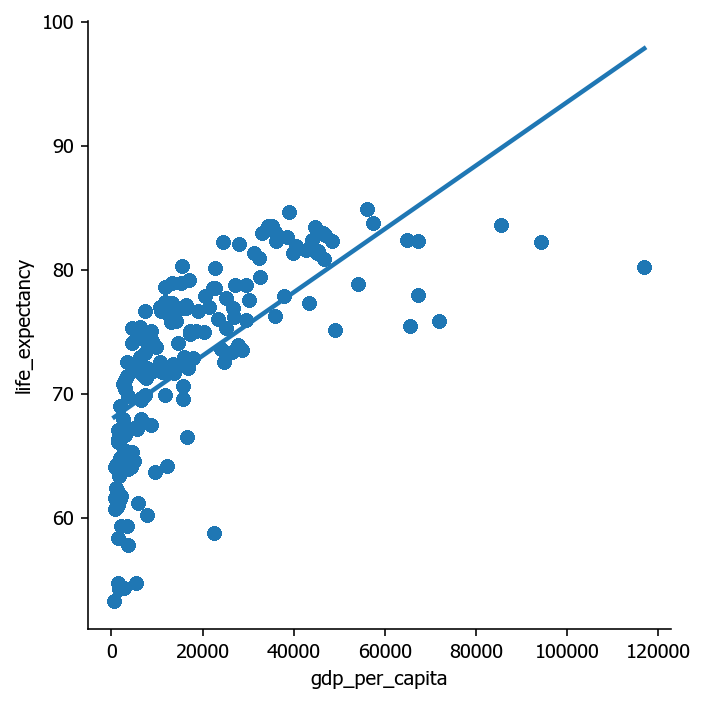

In [80]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='gdp_per_capita', y='life_expectancy', data=df, ci=None);

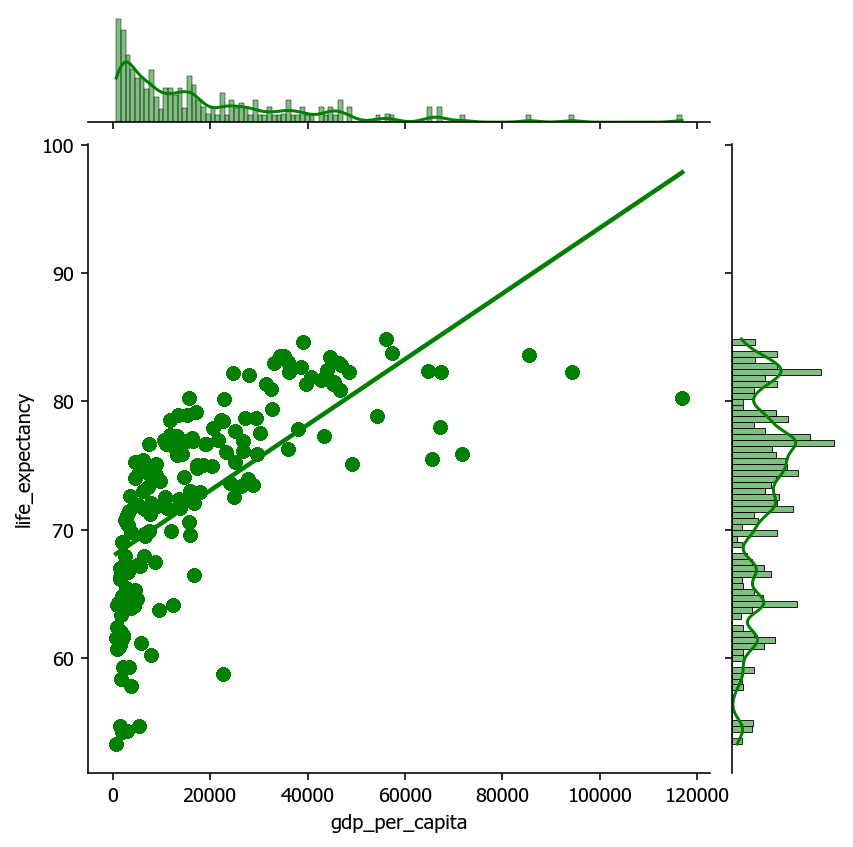

In [81]:
sns.jointplot(x='gdp_per_capita', y='life_expectancy', data=df, kind='reg', ci=None,color='green');

In [97]:
df

,total_deaths,life_expectancy,aged_65_older,aged_70_older,gdp_per_capita,new_cases,population_density
28,1.0,64.83,2.581,1.337,1803.987,6.0,54.422
29,1.0,64.83,2.581,1.337,1803.987,2.0,54.422
30,1.0,64.83,2.581,1.337,1803.987,32.0,54.422
31,2.0,64.83,2.581,1.337,1803.987,6.0,54.422
32,2.0,64.83,2.581,1.337,1803.987,11.0,54.422
...,...,...,...,...,...,...,...
156313,5258.0,61.49,2.822,1.882,1899.775,382.0,42.729
156314,5258.0,61.49,2.822,1.882,1899.775,0.0,42.729
156315,5266.0,61.49,2.822,1.882,1899.775,427.0,42.729
156316,5276.0,61.49,2.822,1.882,1899.775,665.0,42.729


In [98]:
#import statsmodels.api as sm
import statsmodels.formula.api as smf

slr = smf.ols(formula='life_expectancy ~ gdp_per_capita', data=df).fit()
print(slr.summary())
slr

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                 9.497e+04
Date:                Sun, 30 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:06:30   Log-Likelihood:            -3.5330e+05
No. Observations:              112864   AIC:                         7.066e+05
Df Residuals:                  112862   BIC:                         7.066e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         67.9452      0.023   2948.

### ถ้าค่า p (P>|t|) < 0.05 (ค่า p น้อยกว่า 0.05) แสดงว่ามีความสัมพันธ์กัน คือคือตัวแปรต้น (X หรือเหตุ) เป็นสาเหตุ/ส่งผลต่อตัวแปรตาม (Y หรือผล) เช่น กินจุ (เหตุ) ทำให้อ้วน (ผล) ขณะเดียวกัน อ้วน (เหตุ) ทำให้เป็นโรคความดัน เบาหวาน (ผล) เป็นต้น
### ถ้าค่า p (P>|t|) > 0.05 (ค่า p มากกว่า 0.05) แสดงว่าไม่มีความสัมพันธ์กัน คือคือตัวแปรต้น (X หรือเหตุ) ไม่เป็นสาเหตุ/ไม่ส่งผลต่อตัวแปรตาม (Y หรือผล) เช่น กินจุ (เหตุ) แต่ก็ไม่ทำให้อ้วน (ผล) ขณะเดียวกัน อ้วน (เหตุ) ไม่ทำให้เป็นโรคความดัน เบาหวาน (ผล) เป็นต้น
### ค่าอย่างมีนัยสำคัญทางสถิติที่..... ถ้าค่า p < 0.05 แต่ > 0.01 อย่างมีนัยสำคัญทางสถิติที่ 0.05, ถ้าค่า p < 0.01 แต่ > 0.001 อย่างมีนัยสำคัญทางสถิติที่ 0.01, ถ้าค่า p < 0.001 อย่างมีนัยสำคัญทางสถิติที่ 0.000

### การอธิบายค่าสัมประสิทธิ์ถดถอย (coef) ถ้าค่าเป็นบวก (0.8963) หมายความว่า x1 (ตัวแปรอิสระ/ต้น: เหตุ) เพิ่มขึ้น ส่งผลให้ Y (ตัวแปรตาม: ผล) เพิ่มตามไปด้วย ขณะเดียวกัน ถ้าค่าเป็นลบ (-0.8963) หมายความว่า x1 (ตัวแปรอิสระ: เหตุ) เพิ่มขึ้น ส่งผลให้ Y (ตัวแปรตาม: ผล) ลดลง

## แบบจำลองในการศึกษา 
### Y = a + b1x1 + e
### กำหนดให้
#### a = ค่าคงที่ความถดถอยพหุ
#### b1 = ค่าสัมประสิทธิถดถอยของตัวแปรอิสระ (ตัวแปรต้น)
#### Y = life_expectancy อายุคาดเฉลี่ย
#### x1 = gdp_per_capita 
#### e = ค่าความคลาดเคลื่อน

### การอธิบายแปลผล เอาเฉพาะตัวที่มีนัยสำคัญทางสถิติ คือค่า p < 0.05 เท่านั้นมาอธิบายแปลผล
### ผลการศึกษาพบว่า gdp_per_capita (x1) มีความสัมพันธ์ในทิศทางบวกกับ life_expectancy (Y) ที่ระดับนัยสำคัญทางสถิติ 0.000 โดยมีค่าสัมประสิทธิ์ gdp_per_capita เท่ากับ 0.0003 หมายความว่า ถ้า gdp_per_capita เพิ่มขึ้น 1 หน่วย ส่งผลทำให้ life_expectancy เพิ่มขึ้น 0.0003 หน่วย 

## การประเมินโมเดล Regression

In [99]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [114]:
m = df.loc[:,['life_expectancy','gdp_per_capita']]
m

,life_expectancy,gdp_per_capita
28,64.83,1803.987
29,64.83,1803.987
30,64.83,1803.987
31,64.83,1803.987
32,64.83,1803.987
...,...,...
156313,61.49,1899.775
156314,61.49,1899.775
156315,61.49,1899.775
156316,61.49,1899.775


In [108]:
X = df[['gdp_per_capita']]
y = df.life_expectancy
# y = df[['life_expectancy']]

In [109]:
X

,gdp_per_capita
28,1803.987
29,1803.987
30,1803.987
31,1803.987
32,1803.987
...,...
156313,1899.775
156314,1899.775
156315,1899.775
156316,1899.775


In [131]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [132]:
model.coef_.round(4)

array([0.0003])

In [133]:
model.intercept_.round(0)

68.0

In [134]:
print(
    f'ค่าสัมประสิทธิ์ถดถอยเท่ากับ {model.coef_.round(5)} มีค่าเป็นบวก หมายความว่า หากรัฐมีนโยบายกระตุ้นเศรษฐกิจให้จีดีพีต่อหัวเพิ่มขึ้น ส่งผลทำให้อายุคาดเฉลี่ยของประชากรเพิ่มขึ้น 0.02561 ปี (0.0002561*100) ',
    f'ค่า intercept (ค่าคงที่) เท่ากับ {model.intercept_.round(0)} หมายความว่า ถ้าหากรัฐไม่มีการกระตุ้นเศรษฐกิจคือไม่ทำอะไรเลย อายุคาดเฉลี่ยของประชากรอยู่ที่ 68 ปี',
    sep='\n')

ค่าสัมประสิทธิ์ถดถอยเท่ากับ [0.00026] มีค่าเป็นบวก หมายความว่า หากรัฐมีนโยบายกระตุ้นเศรษฐกิจให้จีดีพีต่อหัวเพิ่มขึ้น ส่งผลทำให้อายุคาดเฉลี่ยของประชากรเพิ่มขึ้น 0.02561 ปี (0.0002561*100) 
ค่า intercept (ค่าคงที่) เท่ากับ 68.0 หมายความว่า ถ้าหากรัฐไม่มีการกระตุ้นเศรษฐกิจคือไม่ทำอะไรเลย อายุคาดเฉลี่ยของประชากรอยู่ที่ 68 ปี


In [135]:
#ค่าร้อยละของความถูกต้องแม่นยำ
# ค่าเข้าใกล้ 1 จะดี แต่ถ้าเข้าใกล้ 0 ไม่ดี 
print('R square =',model.score(X,y).round(3))

R square = 0.457


In [136]:
y_predict = model.predict(X)

In [138]:
#ค่าร้อยละของความถูกต้องแม่นยำ
# ถ้าค่า R square เข้าใกล้ 1 จะดี 
print('R square =', r2_score(y,y_predict).round(3))

R square = 0.457


In [139]:
#ค่าเฉลี่ยความคลาดเคลื่อนยกกำลังสอง
# ถ้าค่า MSE เข้าใกล้ 0 จะดี แต่ถ้าาเข้าใกล้ 1 ไม่ค่อยดี 
mean_squared_error(y,y_predict).round(3)

30.652

In [140]:
#ค่าเฉลี่ยความคลาดเคลื่อนสัมบูรณ์
# ถ้าค่า MAE เข้าใกล้ 0 จะดี แต่ถ้าาเข้าใกล้ 1 ไม่ค่อยดี 
mean_absolute_error(y,y_predict).round(3)

4.497

## การแบ่งข้อมูลเพื่อใช้ในการ train_test_split แบบรัน Regression

In [141]:
X = df[['gdp_per_capita']]
y = df.life_expectancy

In [142]:
X.describe().round(0)

,gdp_per_capita
count,112864.0
mean,19412.0
std,19860.0
min,661.0
25%,4467.0
50%,13255.0
75%,27937.0
max,116936.0


In [143]:
y.describe().round(0)

count    112864.0
mean         73.0
std           8.0
min          53.0
25%          67.0
50%          74.0
75%          78.0
max          85.0
Name: life_expectancy, dtype: float64

In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [145]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [146]:
model.score(X_test, y_test).round(3)

0.456

## การพยากรณ์ Simple linear regression แบบวิธีที่ 1

In [147]:
#np.arange(start,stop,step)
#.reshape(-1, 1) -1 หมายถึง กีแถวไม่รู้ให้เครื่องกำหนดให้ 1 หมายถึง 1 คอลัมน์

actual = np.arange(661,116936,2000).reshape(-1, 1)
actual

array([[   661],
       [  2661],
       [  4661],
       [  6661],
       [  8661],
       [ 10661],
       [ 12661],
       [ 14661],
       [ 16661],
       [ 18661],
       [ 20661],
       [ 22661],
       [ 24661],
       [ 26661],
       [ 28661],
       [ 30661],
       [ 32661],
       [ 34661],
       [ 36661],
       [ 38661],
       [ 40661],
       [ 42661],
       [ 44661],
       [ 46661],
       [ 48661],
       [ 50661],
       [ 52661],
       [ 54661],
       [ 56661],
       [ 58661],
       [ 60661],
       [ 62661],
       [ 64661],
       [ 66661],
       [ 68661],
       [ 70661],
       [ 72661],
       [ 74661],
       [ 76661],
       [ 78661],
       [ 80661],
       [ 82661],
       [ 84661],
       [ 86661],
       [ 88661],
       [ 90661],
       [ 92661],
       [ 94661],
       [ 96661],
       [ 98661],
       [100661],
       [102661],
       [104661],
       [106661],
       [108661],
       [110661],
       [112661],
       [114661],
       [116661

In [148]:
y_pred = model.predict(actual).reshape(-1, 1).round(0)
y_pred

C:\Users\Techatach\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[68.],
       [69.],
       [69.],
       [70.],
       [70.],
       [71.],
       [71.],
       [72.],
       [72.],
       [73.],
       [73.],
       [74.],
       [74.],
       [75.],
       [75.],
       [76.],
       [76.],
       [77.],
       [77.],
       [78.],
       [78.],
       [79.],
       [79.],
       [80.],
       [80.],
       [81.],
       [81.],
       [82.],
       [82.],
       [83.],
       [83.],
       [84.],
       [85.],
       [85.],
       [86.],
       [86.],
       [87.],
       [87.],
       [88.],
       [88.],
       [89.],
       [89.],
       [90.],
       [90.],
       [91.],
       [91.],
       [92.],
       [92.],
       [93.],
       [93.],
       [94.],
       [94.],
       [95.],
       [95.],
       [96.],
       [96.],
       [97.],
       [97.],
       [98.]])

In [149]:
data = pd.DataFrame(actual) #.round(0)
##renaming in columns
data = data.rename(columns={0:'Actual_GDP'})
data 

,Actual_GDP
0,661
1,2661
2,4661
3,6661
4,8661
5,10661
6,12661
7,14661
8,16661
9,18661


In [150]:
y_hat = pd.DataFrame(y_pred) #.round(0)
##renaming in columns
y_hat = y_hat.rename(columns={0:'Predict_LE'})
y_hat

,Predict_LE
0,68.0
1,69.0
2,69.0
3,70.0
4,70.0
5,71.0
6,71.0
7,72.0
8,72.0
9,73.0


In [151]:
df = pd.concat([data,y_hat],axis=1).round(0)
#df.to_csv('D:\Python Analysis\DataRegression\APdata.csv')
df

,Actual_GDP,Predict_LE
0,661,68.0
1,2661,69.0
2,4661,69.0
3,6661,70.0
4,8661,70.0
5,10661,71.0
6,12661,71.0
7,14661,72.0
8,16661,72.0
9,18661,73.0


In [1]:
# df.to_excel('D:\Python Analysis\DataRegression\APdata.xlsx')
# df.to_csv('D:\Python Analysis\DataRegression\APdata.csv')

import pandas as pd 
data = pd.read_csv('APdata.csv') 
df = data.drop(['Unnamed: 0'], axis=1) #ลบคอลัมน์
df

,Actual_GDP,Predict_LE
0,661,68.0
1,2661,69.0
2,4661,69.0
3,6661,70.0
4,8661,70.0
5,10661,71.0
6,12661,71.0
7,14661,72.0
8,16661,72.0
9,18661,73.0


## การพยากรณ์ Simple linear regression แบบวิธีที่ 2

In [112]:
#np.linspace(start, stop, num=20, endpoint=True, retstep=False, dtype=None, axis=0)

act2 = np.linspace(661,116936,20).reshape(-1, 1).round(0)
act2

array([[   661.],
       [  6781.],
       [ 12900.],
       [ 19020.],
       [ 25140.],
       [ 31260.],
       [ 37379.],
       [ 43499.],
       [ 49619.],
       [ 55739.],
       [ 61858.],
       [ 67978.],
       [ 74098.],
       [ 80218.],
       [ 86337.],
       [ 92457.],
       [ 98577.],
       [104697.],
       [110816.],
       [116936.]])

In [113]:
y_pred2 = model.predict(act2).reshape(-1, 1).round(0)
y_pred2

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[68.],
       [70.],
       [71.],
       [73.],
       [74.],
       [76.],
       [78.],
       [79.],
       [81.],
       [82.],
       [84.],
       [85.],
       [87.],
       [88.],
       [90.],
       [92.],
       [93.],
       [95.],
       [96.],
       [98.]])

In [114]:
df1 = pd.DataFrame(act2) #.round(0)
##renaming in columns
df1 = df1.rename(columns={0:'Actual_GDP'})
df1 

,Actual_GDP
0,661.0
1,6781.0
2,12900.0
3,19020.0
4,25140.0
5,31260.0
6,37379.0
7,43499.0
8,49619.0
9,55739.0


In [115]:
y_hat2 = pd.DataFrame(y_pred2) #.round(0)
##renaming in columns
y_hat2 = y_hat2.rename(columns={0:'Predict_LE'})
y_hat2

,Predict_LE
0,68.0
1,70.0
2,71.0
3,73.0
4,74.0
5,76.0
6,78.0
7,79.0
8,81.0
9,82.0


In [116]:
df2 = pd.concat([df1,y_hat2],axis=1).round(0)
df2

,Actual_GDP,Predict_LE
0,661.0,68.0
1,6781.0,70.0
2,12900.0,71.0
3,19020.0,73.0
4,25140.0,74.0
5,31260.0,76.0
6,37379.0,78.0
7,43499.0,79.0
8,49619.0,81.0
9,55739.0,82.0


## การพยากรณ์ Simple linear regression แบบวิธีที่ 3

In [117]:
#np.linspace(start, stop, num=20, endpoint=True, retstep=False, dtype=None, axis=0)

dag = pd.DataFrame(np.linspace(661,116936,20), columns=['Actual_GDP']).round(0)
dag 

,Actual_GDP
0,661.0
1,6781.0
2,12900.0
3,19020.0
4,25140.0
5,31260.0
6,37379.0
7,43499.0
8,49619.0
9,55739.0


In [118]:
dm = model.predict(dag).reshape(-1,1).round(0)
dm = pd.DataFrame(dm) 

##renaming in columns
y_hat3 = dm.rename(columns={0:'Predict_LE'})
y_hat3

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Actual_GDP
Feature names seen at fit time, yet now missing:
- gdp_per_capita

  warnings.warn(message, FutureWarning)


,Predict_LE
0,68.0
1,70.0
2,71.0
3,73.0
4,74.0
5,76.0
6,78.0
7,79.0
8,81.0
9,82.0


In [119]:
df3 = pd.concat([dag,y_hat3],axis=1).round(0)
df3

,Actual_GDP,Predict_LE
0,661.0,68.0
1,6781.0,70.0
2,12900.0,71.0
3,19020.0,73.0
4,25140.0,74.0
5,31260.0,76.0
6,37379.0,78.0
7,43499.0,79.0
8,49619.0,81.0
9,55739.0,82.0


## กลุ่มประเทศ AEC

In [129]:
import pandas as pd

df1 = pd.read_csv('D:/Python Analysis/gdp-per-capita-worldbank.csv')
df2 = pd.read_csv('D:/Python Analysis/life-expectancy.csv')

df = df1.merge(df2)
df

,Entity,Code,Year,GDP per capita,Life expectancy
0,Afghanistan,AFG,2002,1189.784668,56.784
1,Afghanistan,AFG,2003,1235.810063,57.271
2,Afghanistan,AFG,2004,1200.278013,57.772
3,Afghanistan,AFG,2005,1286.793659,58.290
4,Afghanistan,AFG,2006,1315.789117,58.826
...,...,...,...,...,...
5525,Zimbabwe,ZWE,2015,3198.982129,59.534
5526,Zimbabwe,ZWE,2016,3173.610829,60.294
5527,Zimbabwe,ZWE,2017,3274.611198,60.812
5528,Zimbabwe,ZWE,2018,3341.665418,61.195


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5530 entries, 0 to 5529
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Entity           5530 non-null   object 
 1   Code             5530 non-null   object 
 2   Year             5530 non-null   int64  
 3   GDP per capita   5530 non-null   float64
 4   Life expectancy  5530 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 259.2+ KB


In [134]:
c = df.Entity.unique()
len(c)

194

In [136]:
# 10 Countries in AEC
AEC = df.loc[df['Entity'].isin(['Singapore','Indonesia','Thailand','Myanmar','Vietnam','Brunei','Laos','Cambodia','Malaysia','Philippines'])].set_index('Entity') #.reset_index() 
AEC

,Code,Year,GDP per capita,Life expectancy
Entity,,,,
Brunei,BRN,1990,71232.789430,70.185
Brunei,BRN,1991,71405.378120,70.439
Brunei,BRN,1992,72705.728040,70.696
Brunei,BRN,1993,70908.808190,70.951
Brunei,BRN,1994,71176.341930,71.207
...,...,...,...,...
Vietnam,VNM,2015,6438.259854,75.110
Vietnam,VNM,2016,6767.778832,75.172
Vietnam,VNM,2017,7155.443187,75.241


In [137]:
AEC.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, Brunei to Vietnam
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Code             297 non-null    object 
 1   Year             297 non-null    int64  
 2   GDP per capita   297 non-null    float64
 3   Life expectancy  297 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.6+ KB


In [138]:
#Save model to .csv
#data.to_csv('D:/Face Detection/Datanew/data1.csv')
d = AEC.loc[:,['GDP per capita','Life expectancy']].dropna() #คำสั่ง .loc ใช้เลือกข้อมูลบางคอลัมน์
d

,GDP per capita,Life expectancy
Entity,,
Brunei,71232.789430,70.185
Brunei,71405.378120,70.439
Brunei,72705.728040,70.696
Brunei,70908.808190,70.951
Brunei,71176.341930,71.207
...,...,...
Vietnam,6438.259854,75.110
Vietnam,6767.778832,75.172
Vietnam,7155.443187,75.241


In [139]:
X = d[['GDP per capita']]
y = d[['Life expectancy']]

In [142]:
X.describe().round(0)

,GDP per capita
count,297.0
mean,19325.0
std,25549.0
min,607.0
25%,3546.0
50%,6699.0
75%,18453.0
max,98412.0


In [143]:
y.describe().round(0)

,Life expectancy
count,297.0
mean,70.0
std,7.0
min,53.0
25%,66.0
50%,70.0
75%,74.0
max,84.0


In [144]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [145]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [146]:
model.score(X_test, y_test).round(3)

0.466

In [147]:
#np.linspace(start, stop, num=20, endpoint=True, retstep=False, dtype=None, axis=0)
import numpy as np

d_th = pd.DataFrame(np.linspace(19325,100000,20), columns=['Actual_GDP']).round(0)
d_th

,Actual_GDP
0,19325.0
1,23571.0
2,27817.0
3,32063.0
4,36309.0
5,40555.0
6,44801.0
7,49047.0
8,53293.0
9,57539.0


In [148]:
dm = model.predict(d_th).reshape(-1,1).round(0)
dm = pd.DataFrame(dm) 

##renaming in columns
y_hat = dm.rename(columns={0:'Predict_LE'})
y_hat

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Actual_GDP
Feature names seen at fit time, yet now missing:
- GDP per capita

  warnings.warn(message, FutureWarning)


,Predict_LE
0,70.0
1,71.0
2,71.0
3,72.0
4,73.0
5,73.0
6,74.0
7,75.0
8,75.0
9,76.0


In [149]:
df = pd.concat([d_th,y_hat],axis=1).round(0)
df

,Actual_GDP,Predict_LE
0,19325.0,70.0
1,23571.0,71.0
2,27817.0,71.0
3,32063.0,72.0
4,36309.0,73.0
5,40555.0,73.0
6,44801.0,74.0
7,49047.0,75.0
8,53293.0,75.0
9,57539.0,76.0


## Thailand

In [150]:
import pandas as pd

df1 = pd.read_csv('D:/Python Analysis/gdp-per-capita-worldbank.csv')
df2 = pd.read_csv('D:/Python Analysis/life-expectancy.csv')

df = df1.merge(df2)
df

,Entity,Code,Year,GDP per capita,Life expectancy
0,Afghanistan,AFG,2002,1189.784668,56.784
1,Afghanistan,AFG,2003,1235.810063,57.271
2,Afghanistan,AFG,2004,1200.278013,57.772
3,Afghanistan,AFG,2005,1286.793659,58.290
4,Afghanistan,AFG,2006,1315.789117,58.826
...,...,...,...,...,...
5525,Zimbabwe,ZWE,2015,3198.982129,59.534
5526,Zimbabwe,ZWE,2016,3173.610829,60.294
5527,Zimbabwe,ZWE,2017,3274.611198,60.812
5528,Zimbabwe,ZWE,2018,3341.665418,61.195


In [152]:
th = df.loc[df['Entity'].isin(['Thailand'])].reset_index() #.set_index('location') #.reset_index() 
th

,index,Entity,Code,Year,GDP per capita,Life expectancy
0,4901,Thailand,THA,1990,7102.056264,70.248
1,4902,Thailand,THA,1991,7619.036169,70.300
2,4903,Thailand,THA,1992,8152.500092,70.281
3,4904,Thailand,THA,1993,8745.552017,70.239
4,4905,Thailand,THA,1994,9358.708398,70.202
5,4906,Thailand,THA,1995,10017.933670,70.191
6,4907,Thailand,THA,1996,10467.454610,70.215
7,4908,Thailand,THA,1997,10059.376810,70.267
8,4909,Thailand,THA,1998,9180.019523,70.348
9,4910,Thailand,THA,1999,9489.818324,70.463


In [153]:
X = th[['GDP per capita']]
y = th[['Life expectancy']]

In [154]:
X.describe().round()

,GDP per capita
count,30.0
mean,12413.0
std,3299.0
min,7102.0
25%,9862.0
50%,12095.0
75%,15181.0
max,18453.0


In [155]:
y.describe().round(0)

,Life expectancy
count,30.0
mean,73.0
std,2.0
min,70.0
25%,70.0
50%,72.0
75%,75.0
max,77.0


In [156]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [157]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [158]:
model.score(X_test, y_test).round(3)

0.968

In [159]:
model.coef_.round(5)

array([[0.00074]])

In [160]:
model.intercept_.round(2)

array([63.52])

In [161]:
print(
    f'ค่าสัมประสิทธิ์ (slope) {model.coef_.round(5)} มีค่าเป็นบวก หมายความว่า หากรัฐมีนโยบายกระตุ้นเศรษฐกิจให้จีดีพีต่อหัวเพิ่มขึ้น ส่งผลทำให้อายุคาดเฉลี่ยของประชากรเพิ่มขึ้น 0.074 ปี (0.00073804*100) ',
    f'ค่า intercept (ค่าคงที่) เท่ากับ {model.intercept_.round(0)} หมายความว่า ถ้าหากรัฐไม่มีการกระตุ้นเศรษฐกิจคือไม่ทำอะไรเลย อายุคาดเฉลี่ยของประชากรอยู่ที่ 64 ปี',
    sep='\n')

ค่าสัมประสิทธิ์ (slope) [[0.00074]] มีค่าเป็นบวก หมายความว่า หากรัฐมีนโยบายกระตุ้นเศรษฐกิจให้จีดีพีต่อหัวเพิ่มขึ้น ส่งผลทำให้อายุคาดเฉลี่ยของประชากรเพิ่มขึ้น 0.074 ปี (0.00073804*100) 
ค่า intercept (ค่าคงที่) เท่ากับ [64.] หมายความว่า ถ้าหากรัฐไม่มีการกระตุ้นเศรษฐกิจคือไม่ทำอะไรเลย อายุคาดเฉลี่ยของประชากรอยู่ที่ 64 ปี


In [162]:
#np.linspace(start, stop, num=20, endpoint=True, retstep=False, dtype=None, axis=0)
import numpy as np

d_th = pd.DataFrame(np.linspace(12413,50000,20), columns=['Actual_GDP']).round(0)
d_th

,Actual_GDP
0,12413.0
1,14391.0
2,16370.0
3,18348.0
4,20326.0
5,22304.0
6,24283.0
7,26261.0
8,28239.0
9,30217.0


In [163]:
dm = model.predict(d_th).reshape(-1,1).round(0)
dm = pd.DataFrame(dm) 

##renaming in columns
y_hat = dm.rename(columns={0:'Predict_LE'})
y_hat

C:\Users\Techatach\anaconda3\lib\site-packages\sklearn\base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Actual_GDP
Feature names seen at fit time, yet now missing:
- GDP per capita

  warnings.warn(message, FutureWarning)


,Predict_LE
0,73.0
1,74.0
2,76.0
3,77.0
4,79.0
5,80.0
6,81.0
7,83.0
8,84.0
9,86.0


In [164]:
df = pd.concat([d_th,y_hat],axis=1).round(0)
df

,Actual_GDP,Predict_LE
0,12413.0,73.0
1,14391.0,74.0
2,16370.0,76.0
3,18348.0,77.0
4,20326.0,79.0
5,22304.0,80.0
6,24283.0,81.0
7,26261.0,83.0
8,28239.0,84.0
9,30217.0,86.0
